# Game Crash da Blaze


Blaze é uma plataforma de _jogos de azar_ e apostas, consituindo de vários tipos de jogos. Um deles é o "Crash" que consiste do jogador apostar um valor e sair da partida antes do jogo atingir um valor **multiplicador** ("_crash points_") de parada, caso não saia antes o jogador perde o valor apostado; retirando-se antes o jogador ganha um valor a depender do _multiplicador_ no qual partida parou.

Conforme a plataforma Blaze.com:

    "O Crash é um jogo interativo em que o objetivo é se retirar da partida antes que o gráfico crashe (pare). Primeiro, você digita o valor que deseja apostar na próxima rodada em "Quantia". Depois de selecionar um valor, pressione o botão "Começar o Jogo". Quando a próxima rodada começar, você verá um multiplicador aumentando. O gráfico continuará subindo e, quanto maior o multiplicador, maior será o seu pagamento. No entanto, se você não se retirar do jogo antes do gráfico parar, você perderá sua aposta. Se você se retirar da aposta com sucesso antes do gráfico parar, você receberá o valor da sua aposta vezes o multiplicador. Exemplo: se você apostar R$ 10 e sair do jogo quando o multiplicador estiver em 2,00x, receberá R$ 20 na sua carteira."
    

Mais detalhes em: https://help.blaze.com/hc/pt-br/articles/360007766398-O-que-%C3%A9-o-Crash-e-como-eu-o-jogo-





## Dados e Históricos

É possível extrair-se os dados dos históricos dos multiplicadores de cada rodada, para ter-se uma ideia do funcionamento e valores do jogo, usando [**_Web Scraping_**](https://pt.wikipedia.org/wiki/Coleta_de_dados_web) por meio de programação usando a linguagem [**Python**]() e algumas de suas ferramentas como [**Requests**](https://requests.readthedocs.io/en/latest/) e [**Selenium**](https://www.selenium.dev/downloads/) ([_O que é 'Selenium'?_](https://pt.wikipedia.org/wiki/Selenium_(software) )).

Uma possibilidade é usar a própria _API_ da blaze que cria um interface para programador ou jogador ter acesso a esses dados de forma mais estruturada e rápida. A _API_ para _Crashe_ pode ser acessada através do endereço _URL_ ["https://blaze.com/api/crash_games/recent"]('https://blaze.com/api/crash_games/recent')

## Abaixo Código Exemplo

No presente código são usados recursos como:

* [Requests](https://requests.readthedocs.io/en/latest/);
* [Pandas](https://pandas.pydata.org/getting_started.html);
* [Matplotlib](https://matplotlib.org/stable/tutorials/index)

As ferramentas python acima são usadas para obter os dados da API (_requests_), criar tabelas para estruturar os dados obtidos (_Pandas_ ) e criar gráficos para visualização dos dados reunidos (_Matplolib_).

### Módulos (bibliotecas) Usadas

A palavra reservada _import_ servirá para "carregar" os recursos a serem usados

1. Requests
2. Pandas
3. Matplotlib

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://blaze.com/api/crash_games/recent'
response_data = requests.get(url)

In [3]:
# Dados a partir da resposta da url no formato json
data = response_data.json()

In [4]:
# Tabela
from IPython.core.display import display, HTML
display( HTML('<br><h2 style="color: black; text-align: center; text-style: bold;">Dados Obtidos (Id - Multiplicador/"crash point")</h2>'))

content = ''
for j in data:
    content += f"""
            <tr style="border: 1px solid black;">
            <td style="border: 1px solid black;">{j['id']}</td>
            <td style="border: 1px solid black;">{j['crash_point']}</td>
            </tr>   
    """

template = f"""<div style="padding: 1px; color: black; font-size: 16px; margin: 0 auto; text-align: center; display: flex; justify-content: center;"> 
            <table style="padding 2px; border: 1px solid gray;"> 
            <th style="border: 1px solid black; font-size: 18px; background-color: #ddd">Id </th> 
            <th style="border: 1px solid black; font-size: 18px; background-color: #ddd">Crash Point</th> 
            {content} 
            </table></div>
            """
display(HTML( template ))
#print(content)
#print(content)
#for i in data:
#    print( f"Id: { i['id'] } - Crash Point: {i['crash_point']}" )
   

AlAm9KBJlG,0
plzXJ0LR1n,4.38
Kl3XvB9KrN,1.51
xrMabWA9rQ,1.38
YrJ370DO1K,1.73
DlZ4VzPA1j,1.67
6rXBaONjkO,1.74
V16GRoPbkB,0
J1oV4d0Mrd,5.36
Arwd4POp1z,4.57
ekj6nANYk9,2.00


In [5]:
data[0]

{'id': 'AlAm9KBJlG', 'crash_point': '0'}

In [6]:
table_ids = data[1].keys()
print( table_ids )
print( [key for key in data[0].keys()])

dict_keys(['id', 'crash_point'])
['id', 'crash_point']


In [7]:
#from dftemplate import showdt
#l = [ k for k in data[0].keys() ]
#print(l)

#for i in data:
#    #print(i)
#    for j in data[0].keys():
#        print(i[j])

#showdt( data, [key for key in data[0].keys() ], 'Dados Obtidos (Id - Multiplicador/Crash Point)' )

#help(showdt)

Abaixo, armazenando Ids e multiplicadores nas variaveis x e y respectivamente

In [8]:

k = None
x, y = [], []
for k in data:
    x.append(k['id'])
    y.append(float(k['crash_point']))
    

Criando a tabela (_dataframe_) dos dados com biblioteca _Pandas_ e desenhando o gráfico:

<AxesSubplot: xlabel='x'>

<Figure size 640x480 with 0 Axes>

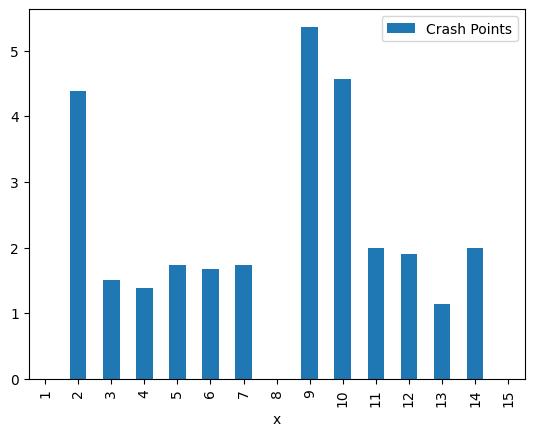

In [9]:
df = pd.DataFrame({ 'x':range(1, 16), 'Crash Points': y}, columns=['x', 'Crash Points'])
plt.figure()
df.plot.bar(x= 'x', y ='Crash Points')

In [10]:
# Tabela dos mutiplicadores (crash points)
df

,x,Crash Points
0,1,0.00
1,2,4.38
2,3,1.51
3,4,1.38
4,5,1.73
5,6,1.67
6,7,1.74
7,8,0.00
8,9,5.36
9,10,4.57


### Código


Abaixo código completo

```python
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://blaze.com/api/crash_games/recent'
response_data = requests.get(url)

# Dados a partir da resposta da url no formato json
data = response_data.json()


# Tabela
from IPython.core.display import display, HTML
display( HTML('<br><h2 style="color: blue; text-alig: center;">Dados Obtidos (Id - Multiplicador/"crash point")</h2>'))
for i in data:
    print( f"Id: { i['id'] } - Crash Point: {i['crash_point']}" )
    

# armazenando Ids e multiplicadores nas variaveis x e y respectivamente
k = None
x, y = [], []
for k in data:
    x.append(k['id'])
    y.append(float(k['crash_point']))
    
df = pd.DataFrame({ 'x':range(1, 16), 'Crash Points': y}, columns=['x', 'Crash Points'])
plt.figure()
df.plot.(x= 'x', y ='Crash Points')
```

Neste material foi usado o [JupyterLab](https://jupyter.org/) para criar um ambiente interativo para programação e visualização dos dados.

#### O Material

_Obs.:_ O presente material tem fins didáticos, sendo interessante para estudos em dados e web scrapping, é recomendado o uso do material bem como suas ferramentas com parcimônia. Não é endossado o uso das plataforma acima citada "Blaze" pois a mesma configura uma plataforma de jogos de azar cujo acesso é vedado a menores de idades. Também advertir-se sobre riscos de perdas as pessoas que participam desses sites de apostas (assim como outras loterias e jogos que onde há probabilidade de ganho é definida e calculada por seus criadores afim de obter ganho reduzindo número possível de apostas vencedoras.) 

#### Recomendação de saúde

As pessoas que conheção ou tenham dificuldades advindas do uso em excesso destas plataformas recomenda-se atentar as fatores de saúde advindas de seu uso abusivo bem como recomenda-se a procura de ajuda de profissionais da saúde em caso de pessoas que tenham problemas como vícios em jogos de azar.

#### Alerta

Alerta-se ao uso abusivo  de plataformas de jogos de azar (as quais são programadas para vencerem o "jogador/usuario") possa acarretar danos financeiros e ou a saúde.


### Página Dimensão Alfa


[Dimensão Alfa](https://www.dimensaoalfa.com.br)